<a href="https://colab.research.google.com/github/Ishan1923/Skin-Cancer-Detection-using-DL-techniques/blob/main/SkinCancerDetectionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Care Detection using Deep Learning Techniques

## **importing** libraries

In [9]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pylab as plt
import os
import tensorflow as tf

## Reading in **Images**

In [10]:
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", dataset_path)

# Construct full path to melanoma test images
melanoma_folder = os.path.join(dataset_path, "Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma")

# Get list of image paths
imgs = glob.glob(os.path.join(melanoma_folder, "*.jpg"))

print(f"Found {len(imgs)} images")

Path to dataset files: /kaggle/input/skin-cancer9-classesisic
Found 16 images


In [11]:
#for plotting images
def plot_images(images_list, rows = 4, cols = 4, x = 15, y = 15):
  fig, ax = plt.subplots(rows, cols, figsize = (x, y))
  ax = ax.flatten()
  for i in range(len(images_list)):
    image = cv2.imread(imgs[i])
    if image is not None:
      ax[i].imshow(image)
      ax[i].set_title(f"image {i + 1}")
  plt.show()

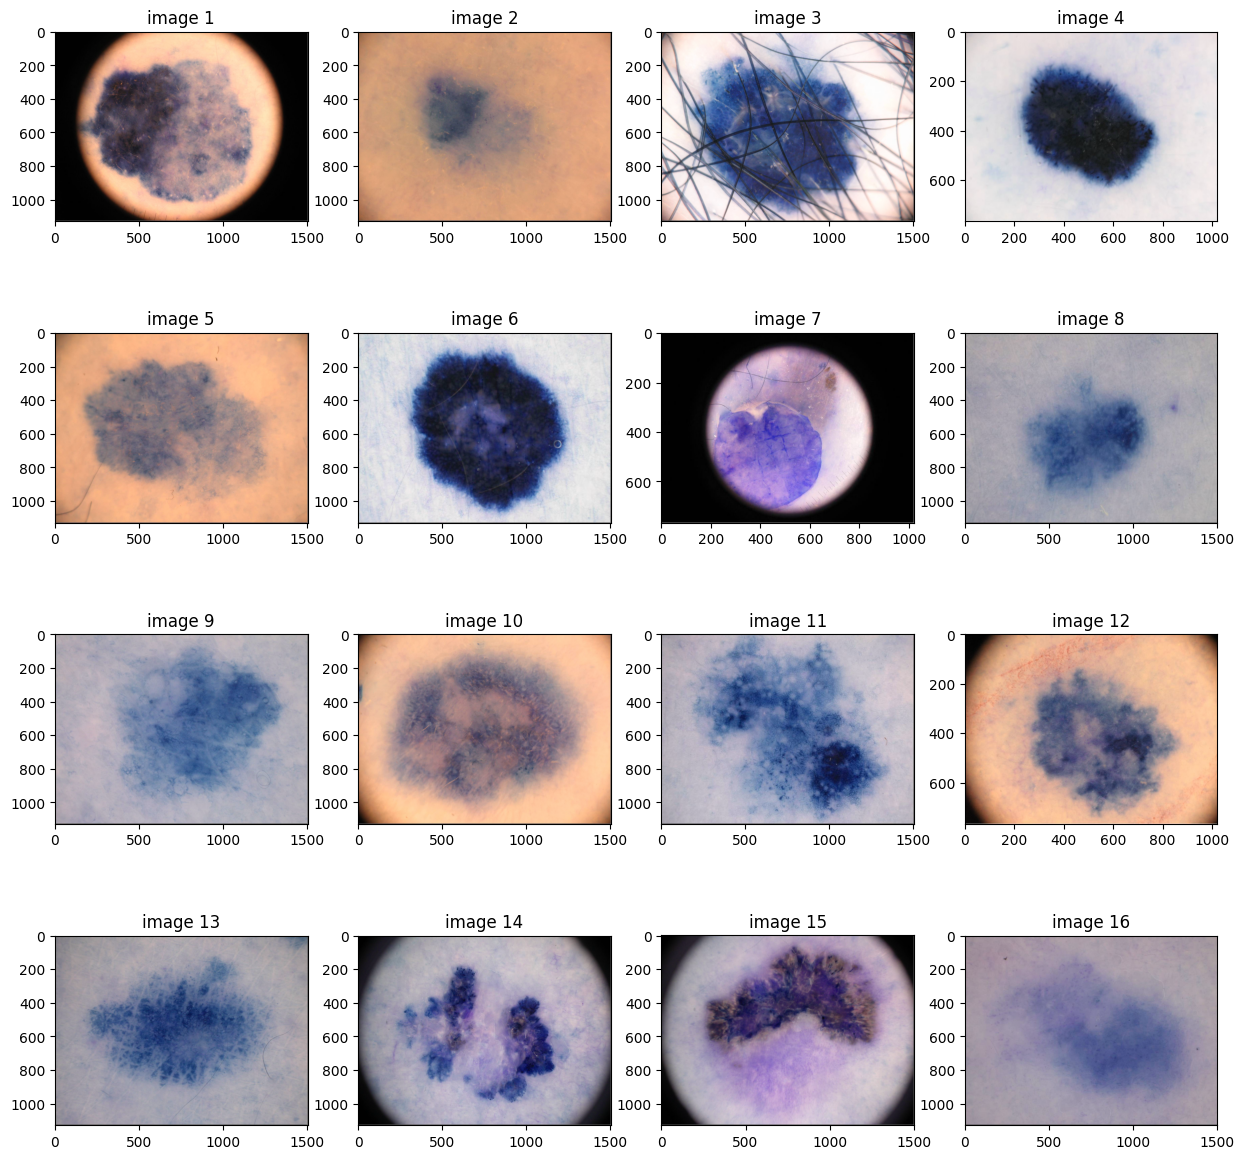

In [12]:
plot_images(imgs)

## **Resizing** Images

In [13]:
#getting the current size of images
org_size = list()
for i in imgs:
  image = cv2.imread(i)
  dim = image.shape
  org_size.append(dim)
org_size

[(1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1503, 3),
 (1129, 1504, 3)]

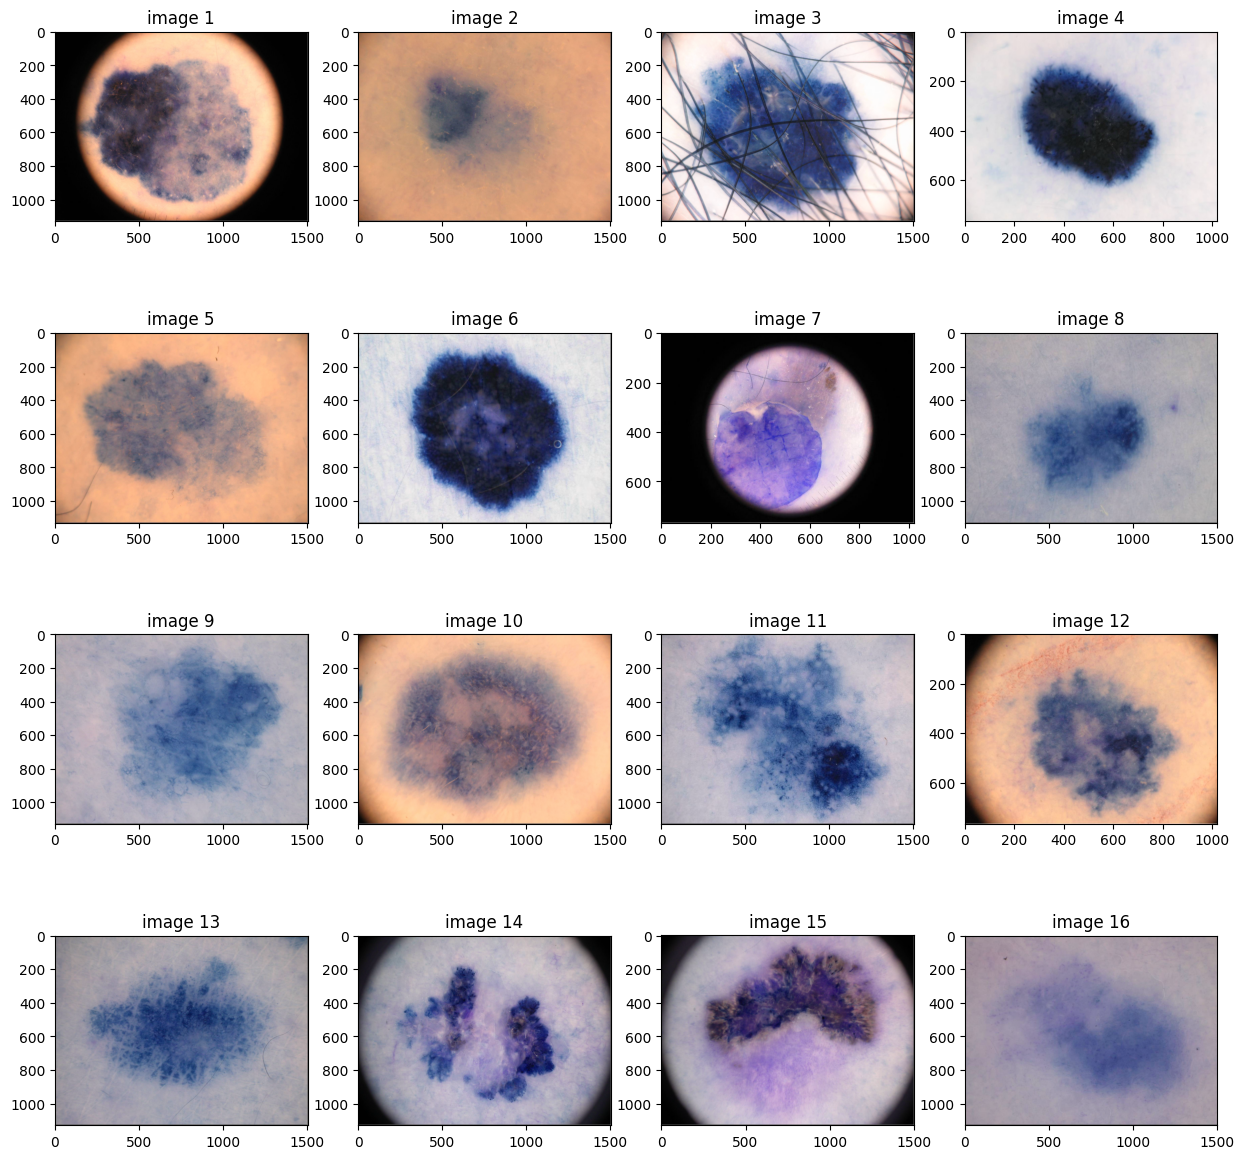

In [14]:
# re-sizing using cv2
resized_images = list()
for i in imgs:
  image = cv2.imread(i)
  if image is None:
    print("can't find the image.")
    continue
  image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
  resized_images.append(image)

#plotting the resized images
plot_images(resized_images)

In [15]:
print(len(org_size))
print(len(resized_images))


16
16


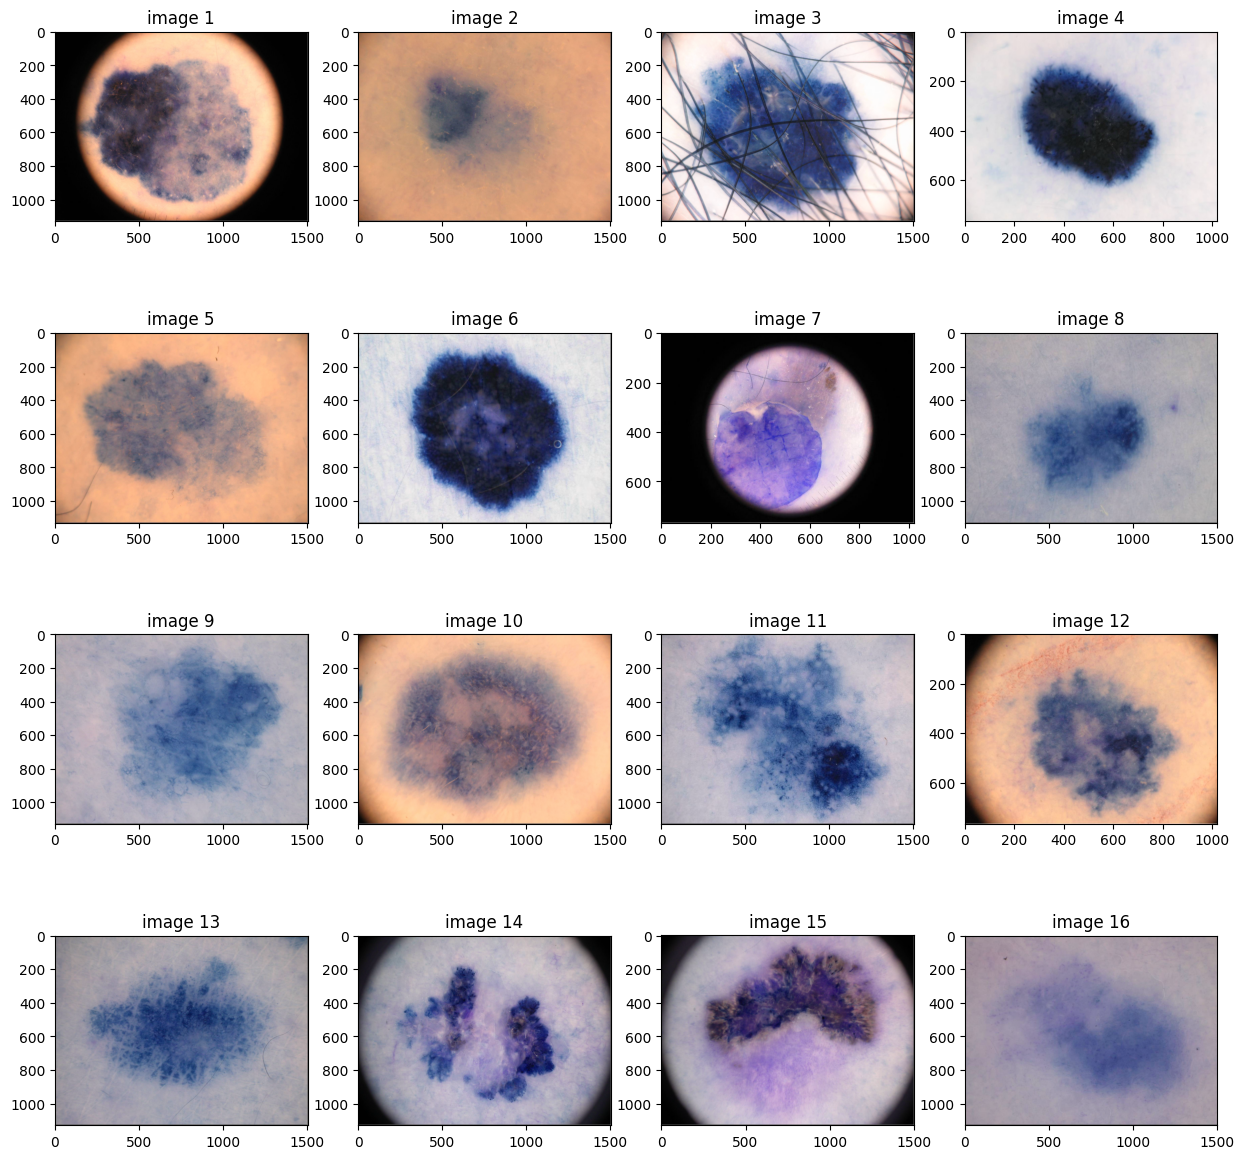

In [16]:
#resize to original sizes the image and store in a list
back2org = list()
for i in range(len(resized_images)):
  image = cv2.resize(resized_images[i], (org_size[i][1], org_size[i][0]))
  back2org.append(image)
plot_images(back2org)


In [17]:
resized_images_dim = list()
for i in resized_images:
  dim = i.shape
  resized_images_dim.append(dim)
resized_images_dim

[(224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3),
 (224, 224, 3)]

In [18]:
org_size_back = list()
for i in back2org:
  dim = i.shape
  org_size_back.append(dim)
org_size_back

[(1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (767, 1022, 3),
 (1129, 1504, 3),
 (1129, 1504, 3),
 (1129, 1503, 3),
 (1129, 1504, 3)]

#### checking information loss on resizing

In [19]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

def quantity_data_loss(original, resized):
  #convert BGR to GRAY for SSIM
  original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

  score_ssim = ssim(original_gray, resized_gray)
  score_mse = mse(original, resized)
  return score_ssim, score_mse

original_imgs = []
for i in imgs:
  image = cv2.imread(i)
  original_imgs.append(image)

ssim_vals = []
mse_vals = []

for i in range(len(original_imgs)):
  s, m = quantity_data_loss(original_imgs[i], back2org[i])
  ssim_vals.append(s)
  mse_vals.append(m)
ssim_vals = np.array(ssim_vals)
mse_vals = np.array(mse_vals)
print(ssim_vals)
print(mse_vals)

[0.93712737 0.96862183 0.90606741 0.98141982 0.96000989 0.93738555
 0.9373666  0.95533807 0.94713357 0.95357736 0.89382857 0.94265986
 0.94124041 0.9338282  0.95290883 0.96753174]
[160.72276253 147.86446908 217.95250045   4.48705447 154.72018324
 204.39759892 208.87777287 159.75692632 166.17668876 162.05649809
 179.64785432  67.66158464 155.42472745 157.84417128 157.10563383
 151.69542121]


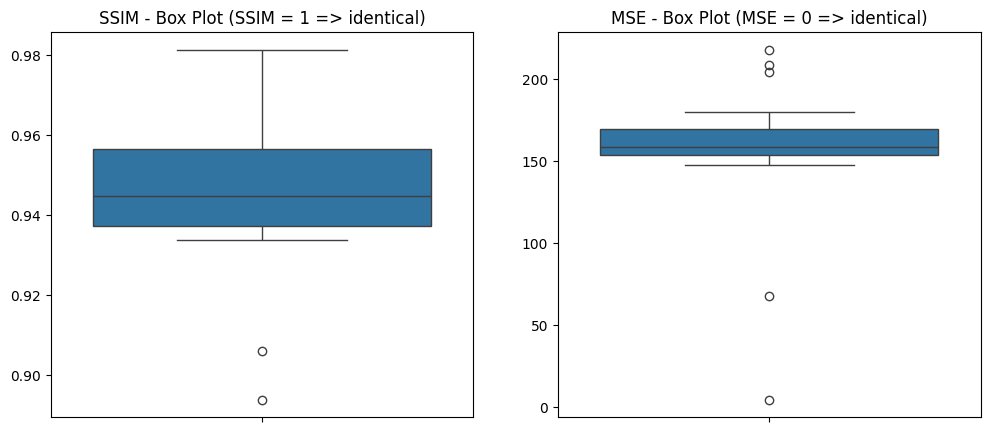

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(y = ssim_vals)
plt.title('SSIM - Box Plot (SSIM = 1 => identical)')
plt.subplot(1,2,2)
sns.boxplot(y = mse_vals)
plt.title('MSE - Box Plot (MSE = 0 => identical)')
plt.show()

Left diagram:                              <br>
=>median = 0.945 approx.                     <br>
=>most outliers are below 0.91               <br>
=>SSIM values range from about 0.89 to 0.98  <br>
Right diagram: <br>
=>MSE values cluster between ~150 and 180<br>
=>outliers lie for mse < 100 or mse > 200 <br>

This shows, most images are struturally similar and with low pixel error, except only few outliers.

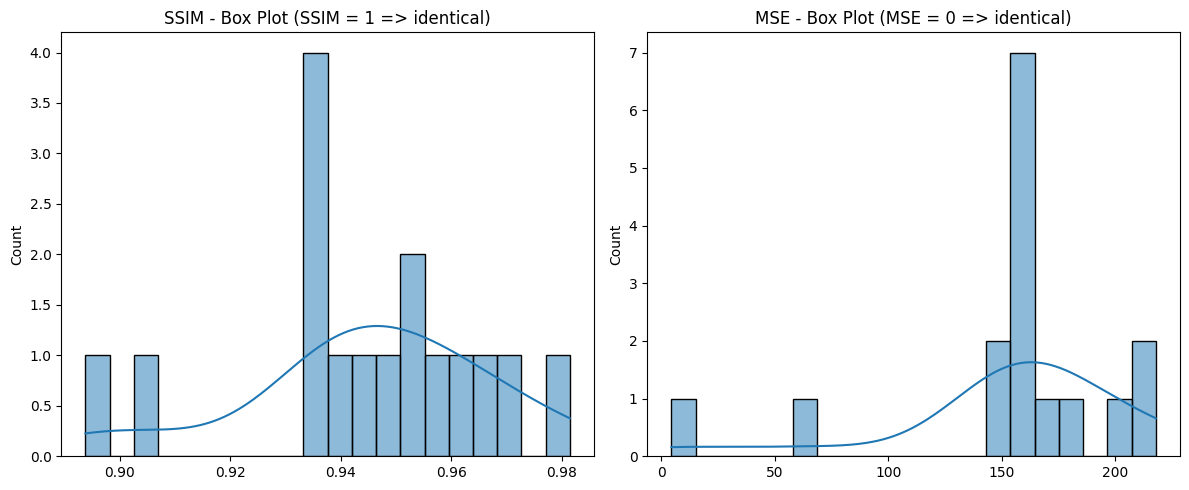

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(ssim_vals, bins = 20, kde = 1)
plt.title('SSIM - Box Plot (SSIM = 1 => identical)')
plt.subplot(1,2,2)
sns.histplot(mse_vals, bins = 20, kde = 1)
plt.title('MSE - Box Plot (MSE = 0 => identical)')
plt.tight_layout()
plt.show()

## **Normalising** pixel values

In [37]:
resized_images = cv2.cvtColor(resized_images, cv2.COLOR_BGR2RGB)

In [38]:
resized_images = np.array(resized_images)
normalised_images = resized_images / 255
normalised_images

array([[[0.        , 0.20392157, 0.96078431],
        [0.64705882, 0.16470588, 0.48627451],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.18823529, 0.14901961],
        [0.78823529, 0.42745098, 0.16470588],
        [0.48627451, 0.        , 0.        ]],

       [[0.94117647, 0.51372549, 0.78431373],
        [0.42745098, 0.16470588, 0.48627451],
        [0.        , 0.        , 0.94117647],
        ...,
        [0.        , 0.43921569, 0.2       ],
        [0.78823529, 0.42745098, 0.16470588],
        [0.48627451, 0.        , 0.        ]],

       [[0.69019608, 0.70588235, 0.77647059],
        [0.42745098, 0.16470588, 0.48627451],
        [0.        , 0.        , 0.81568627],
        ...,
        [0.        , 0.69019608, 0.56078431],
        [0.77647059, 0.42745098, 0.16470588],
        [0.48627451, 0.        , 0.        ]],

       ...,

       [[0.69019608, 0.21176471, 0.78823529],
        [0.42745098, 0.16470588, 0.48627451],
        [0.        , 0

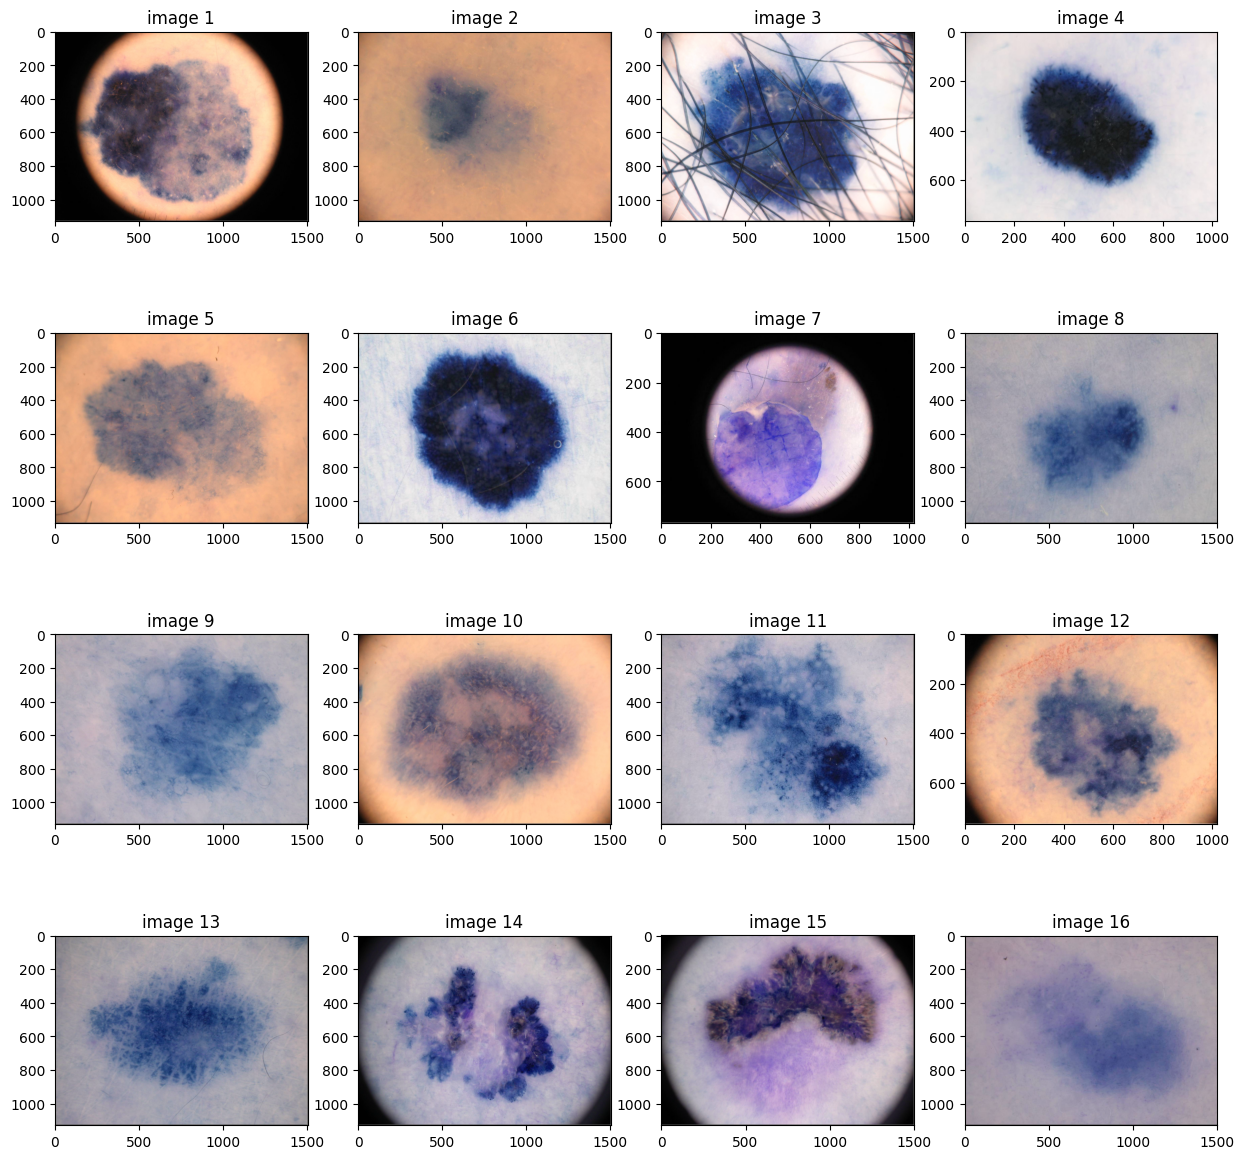

In [39]:
plot_images(normalised_images)

In [41]:
#Converting to tensors
dataset= tf.data.Dataset.from_tensor_slices(normalised_images)
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)
dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 224, 3), dtype=tf.float64, name=None)>

## Removing Unnecessary features (Hairs, etc)

### Display images


## Image Manipulation

### Changing Color Channels

### CV2 Kernels

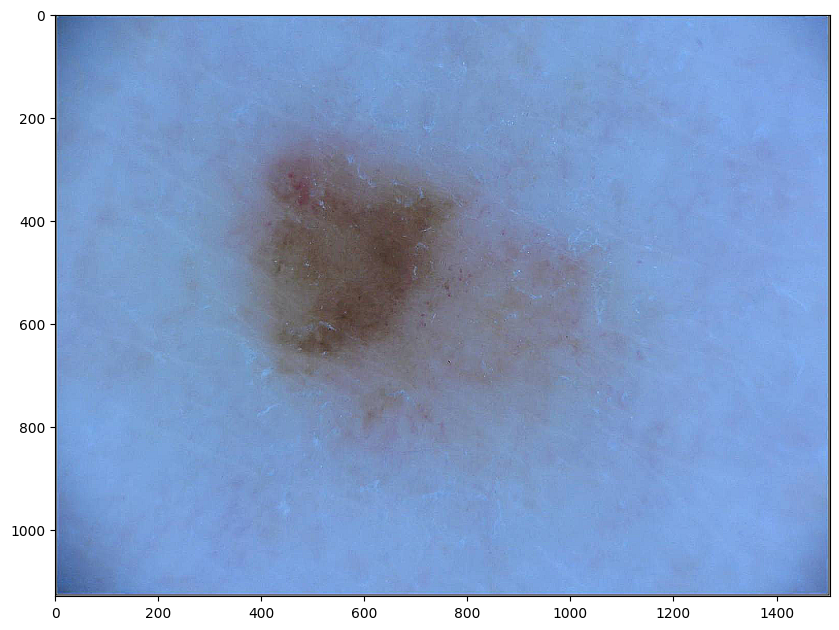

In [32]:
#Sharpen
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1 ,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)


fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(sharpened)

# Applying Keras Linear approach Model

In [57]:
INPUT_HEIGHT = 224
INPUT_WIDTH = 1
CHANNELS = 3

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (INPUT_HEIGHT, INPUT_WIDTH, CHANNELS)),
    tf.keras.layers.Dense(1024) # change this '1024' to the types of diseases you are trying to identify and also check above if you're only imorting one type disease's images, if yes then import all types of images
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [60]:
normalised_images.shape

(16, 224, 3)

In [61]:
normalised_images[0].shape

(224, 3)

In [62]:
# we need a (none, 224, 224, 3) for keras model; thus we have to reshape the normalise image

normalised_images = normalised_images.reshape(normalised_images.shape[0], INPUT_HEIGHT, INPUT_WIDTH, CHANNELS)
normalised_images.shape

(16, 224, 1, 3)

In [63]:
pred= model.predict(normalised_images)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


array([[ 4.25320044e-02,  6.01198494e-01, -8.40987921e-01, ...,
        -4.94848400e-01,  2.46501774e-01,  2.22543418e-01],
       [-3.35370041e-02,  4.19790626e-01, -1.09567738e+00, ...,
        -4.82466221e-01,  9.42646265e-02,  2.75327861e-01],
       [-1.44622281e-01,  2.08972335e-01, -9.85121191e-01, ...,
        -6.43577874e-01,  5.23544699e-02,  3.17040026e-01],
       ...,
       [-1.11649156e-01,  2.38866672e-01, -1.21530592e+00, ...,
        -5.54528475e-01,  9.27504227e-02,  1.70782149e-01],
       [ 2.45733649e-01,  2.92827725e-01, -1.21750844e+00, ...,
        -6.87178612e-01,  7.88854659e-02,  7.19286948e-02],
       [ 2.28319675e-01,  3.19421023e-01, -1.10497308e+00, ...,
        -7.30910659e-01,  1.45154297e-01,  2.83673406e-04]], dtype=float32)

In [67]:
pred_label_index = tf.math.argmax(pred, axis = 1)
print(pred_label_index)
prob = tf.math.softmax(pred)
prob

tf.Tensor([181 102 179 503 633 813 102 358 503 187 358 179 181 181 633 358], shape=(16,), dtype=int64)


<tf.Tensor: shape=(16, 1024), dtype=float32, numpy=
array([[0.00096085, 0.00167989, 0.00039714, ..., 0.0005614 , 0.00117825,
        0.00115036],
       [0.00088492, 0.00139246, 0.00030593, ..., 0.00056486, 0.00100556,
        0.00120516],
       [0.00079529, 0.00113264, 0.00034316, ..., 0.00048287, 0.00096844,
        0.0012619 ],
       ...,
       [0.00081596, 0.0011585 , 0.00027062, ..., 0.000524  , 0.00100101,
        0.00108225],
       [0.00116952, 0.00122591, 0.00027072, ..., 0.0004601 , 0.00098979,
        0.00098293],
       [0.00115242, 0.00126234, 0.00030379, ..., 0.00044159, 0.00106046,
        0.00091744]], dtype=float32)>